# Fashion MNIST dataset, an alternative to MNIST

##  1. Defining the problem and assembling a dataset

For this project, another built-in dataset from Keras was used: fashion MNIST. The dataset contains 70,000 28×28 grayscale images, with 60,000 for training and 10,000 for testing, across 10 fashion classes:

| Label | Description |
|:-----:|:-----------:|
| 0 |T-shirt/top |
| 1 |Trouser |
| 2	|Pullover |
| 3	|Dress |
| 4	|Coat |
| 5	|Sandal |
| 6	|Shirt |
| 7	|Sneaker |
| 8 |Bag |
| 9	|Ankle boot |


The dataset is freely available for academic and commercial use under the MIT license and the copyright is held by Zalando SE. The project aim to answer the following questions:
<ol>
    <li>Is the baseline model sufficient for an accurate classification?</li>
    <li>How do metrics change with different optimisers (Adam, SGD, RMSprop)?</li>
    <li>What difference has overfitting on the model's metrics?</li>
    <li>Do models perform better or worse after regularisation?</li>
    <li>Can the model identify the class of clothing in a given image?</li>
</ol>
The hypothesis is that Fashion MNIST contains enough information for a model to learn the relevant relationships between the images (inputs) and their corresponding clothing class (outputs), allowing for an accurate prediction.

In [15]:
# Load data
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('tensor shape')
print('\ttraining images: ', train_images.shape)
print('\ttraining labels: ', train_labels.shape)
print('\ttest images: ', test_images.shape)
print('\ttest labels: ', test_labels.shape)

tensor shape
	training images:  (60000, 28, 28)
	training labels:  (60000,)
	test images:  (10000, 28, 28)
	test labels:  (10000,)


The tensor shape consists of the following training and test values:

**60,000 images, each 28x28 pixels**<br>
training images:  (60000, 28, 28)  

**60,000 labels, one per image**<br>
training labels:  (60000,)

**10,000 test images**<br>
test images:      (10000, 28, 28)

**10,000 test labels**<br>
test labels:      (10000,)          

## 2. Choosing a measure of success

Since this is a multi-class classification problem, accuracy will be the primary measure of success, because it indicates the proportion of correctly classified images from the total number of images in the dataset. 

```
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```

Precision for a given class in multi-class classification is the fraction of images correctly classified as belonging to a specific class out of all images the model predicted to belong to that class. It will determine how many predicted items of a given class are correct. 

```
Precision = TP / (TP + FP)
```

Recall in multi-class classification is the fraction of images in a class that the model correctly classified out of all images in that class. It measures how many actual images of that class were correctly identified. 

```
Recall = TP / (TP + FN)
```

For the loss, the best function to use is **categorical_crossentropy** as it will measure the distance between two probability distributions, the probability distribution output by the network and the true distribution of the labels. A minimal loss curve is the proof that the network trains to output something as close as possible to the true labels.

## 3. Deciding an evaluation protocol

To measure the progress, it will be used the <strong>hold-out</strong> method which involves splitting data into multiple parts for training, validating and testing the model. As the images are already split into a training and a test set, to fine-tune the model's performance, the train set can be further split into 80%-20% in a validation set to detect overfitting. 

For the regularisation of the network, the <strong>dropout</strong> technique can be applied to a layer and it consists of randomly setting to zero (dropping out) a number of output features of the layer during the training. <strong>L2 regularisation (weight decay)</strong> will help prevent overfitting by penalising large weight values. 

To tune the model capacity and reduce overfitting, the model will be evaluated with different number of layers and hidden units and trained with different optimisers such as Adam, SGD, and RMSprop. 

<strong>Adam (Adaptive Moment Estimation)</strong>: The algorithm is able to adaptively adjust the learning rate for each network weight individually. While SGD maintains a single learning rate throughout training, Adam optimiser dynamically computes individual learning rates based on the past gradients and their second moments. It has a faster running time and low memory requirements, but it might generalise less the data compared to other optimisers.

<strong>SGD (Stochastic Gradient Descent)</strong>: The algorithm doesn't process the entire dataset during each iteration, but randomly select batches of data, implying that only a few samples from the dataset are considered at a time. As it can compute very slowly, the momentum can be added helping with a faster convergence of the loss function. 

<strong>RMSprop (Root Mean Square)</strong>: The algorithm focuses on accelerating the optimisation process by decreasing the number of function evaluations to reach the local minimum and it keeps the moving average of squared gradients for every weight and divides the gradient by the square root of the mean square.

## 4. Preparing your data

Image preprocessing is the process of manipulating image data into a usable format and it is a crucial first step to prepare the images before using them to develop the model. For this project,  the preprocessing steps to be carried out are the following:

<ul>
    <li>Normalisation</li>
    <li>Reshape</li>
    <li>One-hot encoding</li>
</ul>

### Normalisation

All the images in fashion MNIST dataset have pixel values between 0 and 255. Before feeding these data into the network, the images should be converted to float32 and divided by 255, so they can be scaled to point values in the 0–1 range.

In [2]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

### Reshape

Reshaping the tensor means rearranging its rows and columns to match a target shape. The reshaped tensor has the same total number of coefficients of the initial tensor, because the purpose is simply to change the shape of a tensor without changing its underlying data.

In [3]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

### One-hot encoding

The labels in the Fashion MNIST dataset are initially represented as integers (0–9), each corresponding to a specific clothing class. One-hot encoding replaces each integer label with a vector where all positions are zero, except for the index corresponding to the class, which is set to one. In Keras, the to_categorical() function converts labels into a categorical format required for multi-class classification. The training data is split into training and validation sets, where there are:

Partial training data (partial_train_images and partial_train_labels): 45,000 samples used for model training.
Validation data (validation_images and validation_labels): 15,000 samples for evaluation during the training.

In [4]:
from keras.utils import to_categorical

partial_train_images = train_images[:45000]
partial_train_labels = train_labels[:45000]

validation_images = train_images[45000:]
validation_labels = train_labels[45000:]

partial_train_labels = to_categorical(partial_train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

print(partial_train_labels.shape)
print(validation_labels.shape)


(45000, 10)
(15000, 10)


### Helper functions

plot_statistic(history) is an helper function that plots the training and validation metrics extracted from the history returned after iterating throughout the dataset.

evaluation_prediction(network, test_images, test_labels) is a function that evaluates the model on the test set and calculates the prediction on a sample images and calls the argmax function on the prediction. Argmax returns the indices of the maximum values.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
'''
    Plots training and validation metrics including accuracy, loss, precision, and recall.

    Parameters:
    history: History object returned from model.fit() containing training metrics.
'''

def plot_statistic(history):
    # Extract metrics from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    precision = history.history['precision']
    val_precision = history.history['val_precision']
    recall = history.history['recall']
    val_recall = history.history['val_recall']
    
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 10))
    
    # Plot training and validation accuracy
    plt.subplot(2, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training')
    plt.plot(epochs, val_acc, 'b-', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.margins(0.05)
    
    # Plot training and validation loss
    plt.subplot(2, 2, 2)
    plt.plot(epochs, loss, 'ro-', label='Training')
    plt.plot(epochs, val_loss, 'r-', label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.margins(0.05)
    
    # Plot training and validation precision
    plt.subplot(2, 2, 3)
    plt.plot(epochs, precision, 'go-', label='Training')
    plt.plot(epochs, val_precision, 'g-', label='Validation')
    plt.title('Training and Validation Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()
    plt.margins(0.05)
    
    # Plot training and validation recall
    plt.subplot(2, 2, 4)
    plt.plot(epochs, recall, 'mo-', label='Training')
    plt.plot(epochs, val_recall, 'm-', label='Validation')
    plt.title('Training and Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.margins(0.05)
    
    plt.tight_layout()
    plt.show()


In [7]:
'''
   Run the evaluation and prediction of the model

   Parameters: network, test_images and test_labels
'''

def evaluation_prediction(network, test_images, test_labels):
    # Evaluate the model
    results = network.evaluate(test_images, test_labels)
    
    # Extract metric names dynamically
    metric_names = network.metrics_names
    eval_metrics = dict(zip(metric_names, results))
    
    print(f"Test loss: {eval_metrics.get('loss', 'N/A'):.4f}")
    print(f"Test accuracy: {eval_metrics.get('accuracy', 'N/A'):.4f}")
    print(f"Test precision: {eval_metrics.get('precision', 'N/A'):.4f}")
    print(f"Test recall: {eval_metrics.get('recall', 'N/A'):.4f}")
    
    # Make a prediction on a single image
    sample_image = test_images[1:2] 
    prediction = network.predict(sample_image)
    predicted_label = np.argmax(prediction) 

    # Print the full prediction array
    print("\nPrediction probabilities:")
    print(prediction)
    
    # Display the image
    plt.imshow(test_images[1].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis("off")
    plt.show()
    
    return predicted_label 

## 5. Developing a model that does better than the baseline

Here a breakdown of the model and its description

Sequential model: It means that layers are stacked one after another and each layer has one input tensor and one output tensor.
Dense layer: Each layer is Dense (fully connected), meaning that every tensor in one layer is connected to every tensor in the next layer.

The first Dense layer in the network has 512 hidden units, meaning that the input data will be projected onto a 512-dimensional representation space. Based on DLWP 3.4.3 (1st edition), this is controlled by the weight matrix W, which has a shape of (input_dimension, 512)—in this case, (784, 512) since the images have 784 pixels (28×28). The transformation performed by this layer follows the standard Dense layer operation:

<center><strong>output</strong> = relu(dot(W, input) + b)</center>

ReLu activation: rectified linear unit is a function meant to zero out negative values.

The second layer is the output layer, with 10 hidden units corresponding to the 10 fashion classes and it will return an array of 10 probability scores. The probability scores are obtained by the Softmax activation.

Softmax activation: the function converts the output of the layer into a probability distribution over the 10 classes. Each hidden unit outputs a value between 0 and 1, and the sum of all outputs is always 1. The category with the highest probability is chosen as the model's predicted class.

**Compile method**<br>
RMSprop optimiser: Root Mean Square Propagation adjusts the learning rate dynamically, helping the model converge faster. It calculates the gradient of the loss function with respect to the model's parameters, then it updates the parameters in the opposite direction of the gradient to minimize the loss and it uses a moving average of squared gradients to scale the learning rate for each parameter.

Loss function: Categorical Crossentropy is used because this is a multi-class classification problem. It measures how far the model's predicted probabilities are from the actual one-hot encoded labels.

Metrics: loss, accuracy, precision, recall, val_loss, val_accuracy, val_precision, val_recall are tracked during training. Accuracy is the proportion of correctly classified images.

**Fit method**<br>
The input data are the partial_train_images and partial_train_labels for the training.

Epochs: The epochs are the number of iteration over the entire training data and in this case it will train for 6 epochs, meaning it will iterate over the entire dataset 6 times, adjusting the weights and biases in each iteration to minimise the loss.

Batch size: The batch size is the number of samples per gradient update. A batch size of 128 means that the model will update the weights after every 128 samples.

Validation data: The validation_images and validation_labels are the validation data used to monitor the model’s performance on the data that hasn’t seen before.

Epoch 1/6


2025-02-14 13:37:20.514645: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


352/352 [==============================] - 2s 5ms/step - loss: 0.5952 - accuracy: 0.7899 - precision: 0.8452 - recall: 0.7256 - val_loss: 0.6899 - val_accuracy: 0.7741 - val_precision: 0.7982 - val_recall: 0.7531
Epoch 2/6
352/352 [==============================] - 1s 4ms/step - loss: 0.4111 - accuracy: 0.8518 - precision: 0.8831 - recall: 0.8192 - val_loss: 0.4613 - val_accuracy: 0.8349 - val_precision: 0.8624 - val_recall: 0.8112
Epoch 3/6
352/352 [==============================] - 2s 5ms/step - loss: 0.3602 - accuracy: 0.8689 - precision: 0.8948 - recall: 0.8434 - val_loss: 0.4209 - val_accuracy: 0.8393 - val_precision: 0.8655 - val_recall: 0.8196
Epoch 4/6
352/352 [==============================] - 1s 4ms/step - loss: 0.3281 - accuracy: 0.8801 - precision: 0.9036 - recall: 0.8580 - val_loss: 0.3289 - val_accuracy: 0.8815 - val_precision: 0.9041 - val_recall: 0.8606
Epoch 5/6
352/352 [==============================] - 1s 4ms/step - loss: 0.3062 - accuracy: 0.8861 - precision: 0.9056

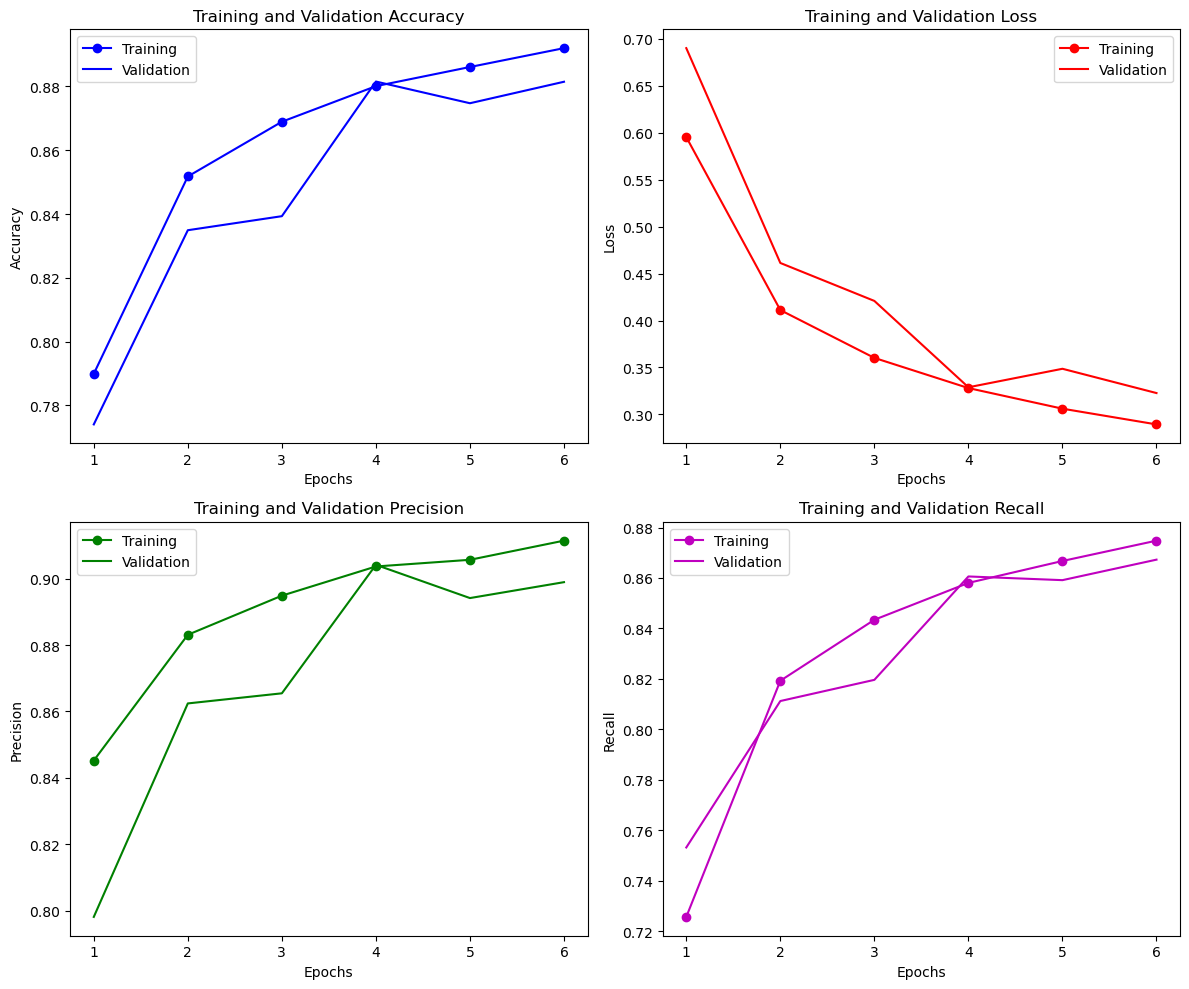

In [8]:
from tensorflow.keras import models, layers
import keras

network = models.Sequential()

# First hidden layer with 512 units and ReLU activation
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))

# Output layer with 10 units (one per class) and Softmax activation
network.add(layers.Dense(10, activation='softmax'))

# Compile the model with RMSprop optimiser, categorical crossentropy loss, and accuracy metric
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

# Used to train the model for a fixed number of epochs
history = network.fit(
    partial_train_images, 
    partial_train_labels, 
    epochs=6, 
    batch_size=128, 
    validation_data=(validation_images, validation_labels))

plot_statistic(history)

The outputs show the model's performance over the 6 epochs, with the following metrics: loss, accuracy, precision, recall, validation loss, validation accuracy, validation precision and validation recall. The results can be interpreted as follow:

Training:
Accuracy increases reaching up to 89.20%, precision is also improving and reaches 91.14%, recall reaches 87.48%, meaning most true positive samples are correctly classified. Loss starts at 0.59 and drops to 0.29, showing the model is improving on training data.

Validation:
Validation accuracy stabilises around 77%-88%, validation precision fluctuates but it remains slightly higher (~80%-90%) and validation recall stabilises around 75%-87%. Validation loss decreases with a slightly fluctuation around epoch 5.

Results:
The model achieved a good balance between training and validation performance and it suggests that is not memorising the training data but rather learning to generalise from it, as it's indicating the high validation accuracy and the decreasing of the validation loss.

| Metric                   | Lowest       | Highest       |
|--------------------------|--------------|---------------|
| **Training loss**        | 28.94%       | 59.52%        |
| **Training accuracy**    | 78.99%       | 89.20%        |
| **Traning precision**    | 84.52%       | 91.14%        |
| **Training recall**      | 72.56%       | 87.48%        |
| **Validation loss**      | 68.99%       | 32.28%        |
| **Validation accuracy**  | 77.41%       | 88.15%        |
| **Validation precision** | 79.82%       | 90.41%        |
| **Validation recall**    | 75.31%       | 86.73%        |


## 6. Scaling up: developing a model that overfits

The baseline model has shown a good balance with 6 epochs and the RMSprop (Root Mean Square Propagation) optimiser, but to understand how big the right model can be, it should be scaled up to overfit. In this occasion, the baseline model has been scaled up in two different way:
<ol>
    <li>The first model has an increased capacity with more layers, hidden units gradually reduced from 1024 to 128 (1024 → 512 → 256 → 128), increased the training epochs from 6 to 15 and used the 'Adam' optimiser that adapt the learning rate during training. </li>
    <li>The second model is essentially similar to the first scaled up model except for the optimiser. In this case the 'SGD' optimiser has been used to better generalise the data and it is relatively insensitive to the choice of hyperparameters.</li>
</ol>


### Adam optimiser

Generally the Adam optimiser performs better across all metrics, indicating effective learning and generalisation. The training performance results shows a high training accuracy of 92.90%, indicating that it has learned the training data well and considering that the validation accuracy is also strong (89.52%), it suggests that the model generalises well to unseen data. The training loss is significantly lower than the validation loss and the gap is indicating that the model is overfitting but not severely. The precision and recall metrics are also high, indicating that the model is effectively identifying positive cases without too many false positives or negatives.

| Metric                | Lowest Value | Highest Value |
|-----------------------|--------------|---------------|
| **Training Loss**     | 18.45%       | 51.70%        |
| **Training Accuracy** | 81.16%       | 92.90%        |
| **Training Precision**| 86.49%       | 93.78%        |
| **Training Recall**   | 75.66%       | 92.16%        |
| **Validation Loss**   | 31.53%       | 40.49%        |
| **Validation Accuracy**| 85.24%      | 89.52%        |
| **Validation Precision**| 88.93%     | 90.68%        |
| **Validation Recall** | 81.45%       | 88.53%        |


Epoch 1/15
352/352 [==============================] - 5s 12ms/step - loss: 0.5170 - accuracy: 0.8116 - precision: 0.8649 - recall: 0.7566 - val_loss: 0.4049 - val_accuracy: 0.8524 - val_precision: 0.8893 - val_recall: 0.8145
Epoch 2/15
352/352 [==============================] - 4s 11ms/step - loss: 0.3763 - accuracy: 0.8629 - precision: 0.8923 - recall: 0.8334 - val_loss: 0.3673 - val_accuracy: 0.8651 - val_precision: 0.8904 - val_recall: 0.8430
Epoch 3/15
352/352 [==============================] - 5s 13ms/step - loss: 0.3338 - accuracy: 0.8761 - precision: 0.9020 - recall: 0.8526 - val_loss: 0.3623 - val_accuracy: 0.8723 - val_precision: 0.8908 - val_recall: 0.8530
Epoch 4/15
352/352 [==============================] - 5s 14ms/step - loss: 0.3084 - accuracy: 0.8862 - precision: 0.9081 - recall: 0.8648 - val_loss: 0.3428 - val_accuracy: 0.8799 - val_precision: 0.8969 - val_recall: 0.8634
Epoch 5/15
352/352 [==============================] - 5s 13ms/step - loss: 0.2904 - accuracy: 0.8895

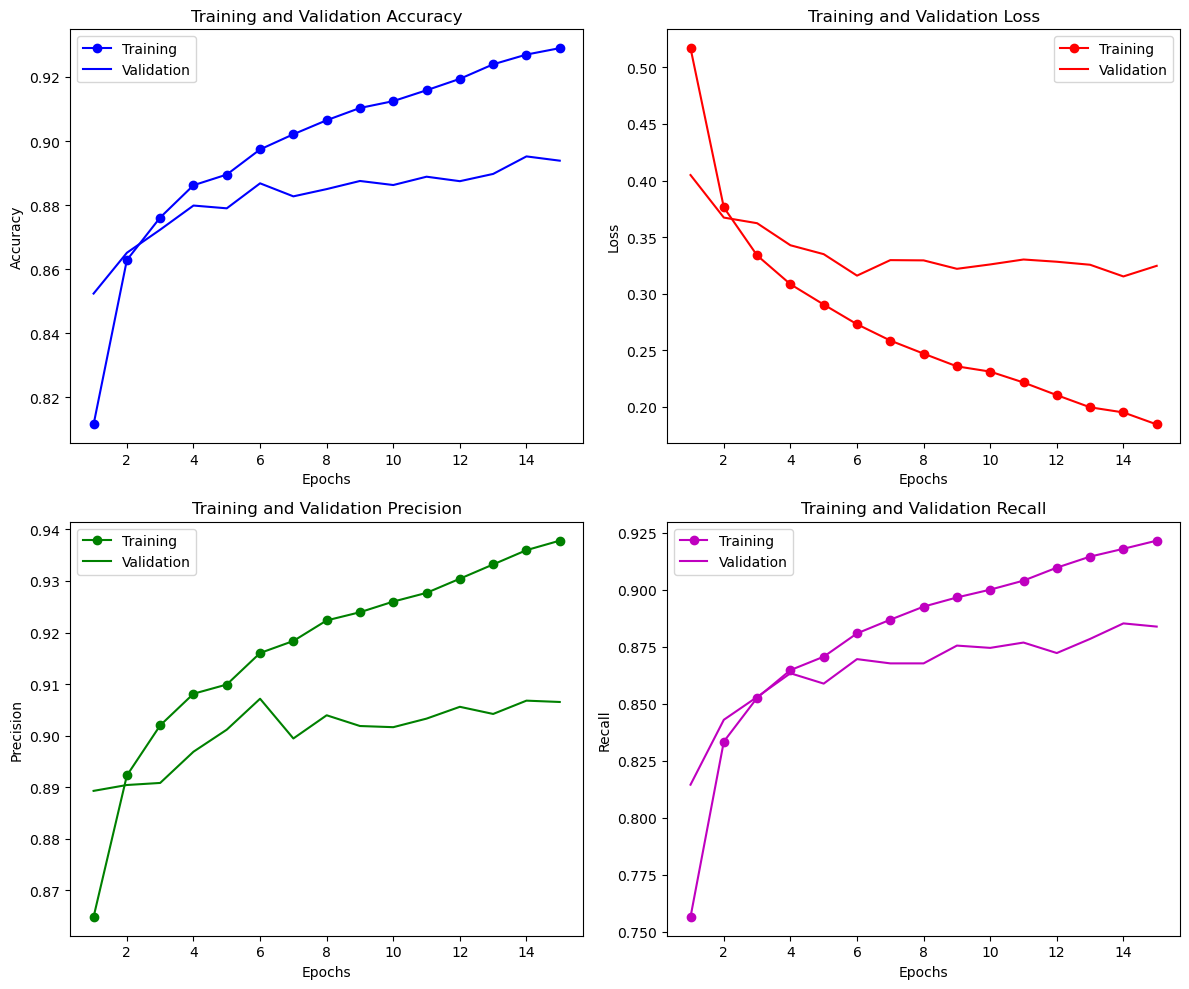

In [9]:
network = models.Sequential()

# Added more layers and more hidden units per layer
network.add(layers.Dense(1024, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))

# Output layer with 10 units (one per class) and Softmax activation
network.add(layers.Dense(10, activation='softmax'))

# Compile the model with Adam optimiser
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

# Train for more epochs to make it overfit
ad_history = network.fit(
    partial_train_images, 
    partial_train_labels, 
    # increased from 6 to 15
    epochs=15, 
    batch_size=128, 
    validation_data=(validation_images, validation_labels))

plot_statistic(ad_history)

### SGD optimiser

It seems struggling with lower accuracy, precision, and recall, indicating it may not be capturing the underlying patterns effectively. The training accuracy of 87.39% is lower than the Adam optimiser's accuracy, suggesting that the model has not learned the training data as effectively, even if the validation accuracy of 86.25% is close to the training accuracy. The training loss is higher than the Adam optimiser's training loss, indicating that the model is not fitting the training data well, and the validation loss is also higher. The precision and recall metrics are lower than those of the Adam optimiser, indicating that the model may be missing some positive cases or generating more false positives.

| Metric                | Lowest       | Highest       |
|-----------------------|--------------|---------------|
| **Training Loss**     | 35.63%       | 115.13%       |
| **Training Accuracy** | 67.08%       | 87.39%        |
| **Training Precision**| 86.41%       | 90.27%        |
| **Training Recall**   | 34.53%       | 84.59%        |
| **Validation Loss**   | 38.25%       | 70.75%        |
| **Validation Accuracy**| 76.77%      | 86.25%        |
| **Validation Precision**| 84.95%     | 89.33%        |
| **Validation Recall** | 61.62%       | 83.17%        |


Epoch 1/15
352/352 [==============================] - 3s 8ms/step - loss: 1.1513 - accuracy: 0.6708 - precision: 0.8856 - recall: 0.3453 - val_loss: 0.7075 - val_accuracy: 0.7677 - val_precision: 0.8646 - val_recall: 0.6162
Epoch 2/15
352/352 [==============================] - 3s 7ms/step - loss: 0.6286 - accuracy: 0.7845 - precision: 0.8641 - recall: 0.6752 - val_loss: 0.5917 - val_accuracy: 0.7927 - val_precision: 0.8495 - val_recall: 0.7175
Epoch 3/15
352/352 [==============================] - 3s 8ms/step - loss: 0.5422 - accuracy: 0.8133 - precision: 0.8708 - recall: 0.7402 - val_loss: 0.5252 - val_accuracy: 0.8177 - val_precision: 0.8726 - val_recall: 0.7536
Epoch 4/15
352/352 [==============================] - 3s 9ms/step - loss: 0.5005 - accuracy: 0.8262 - precision: 0.8753 - recall: 0.7685 - val_loss: 0.5012 - val_accuracy: 0.8196 - val_precision: 0.8707 - val_recall: 0.7607
Epoch 5/15
352/352 [==============================] - 3s 8ms/step - loss: 0.4698 - accuracy: 0.8362 - pr

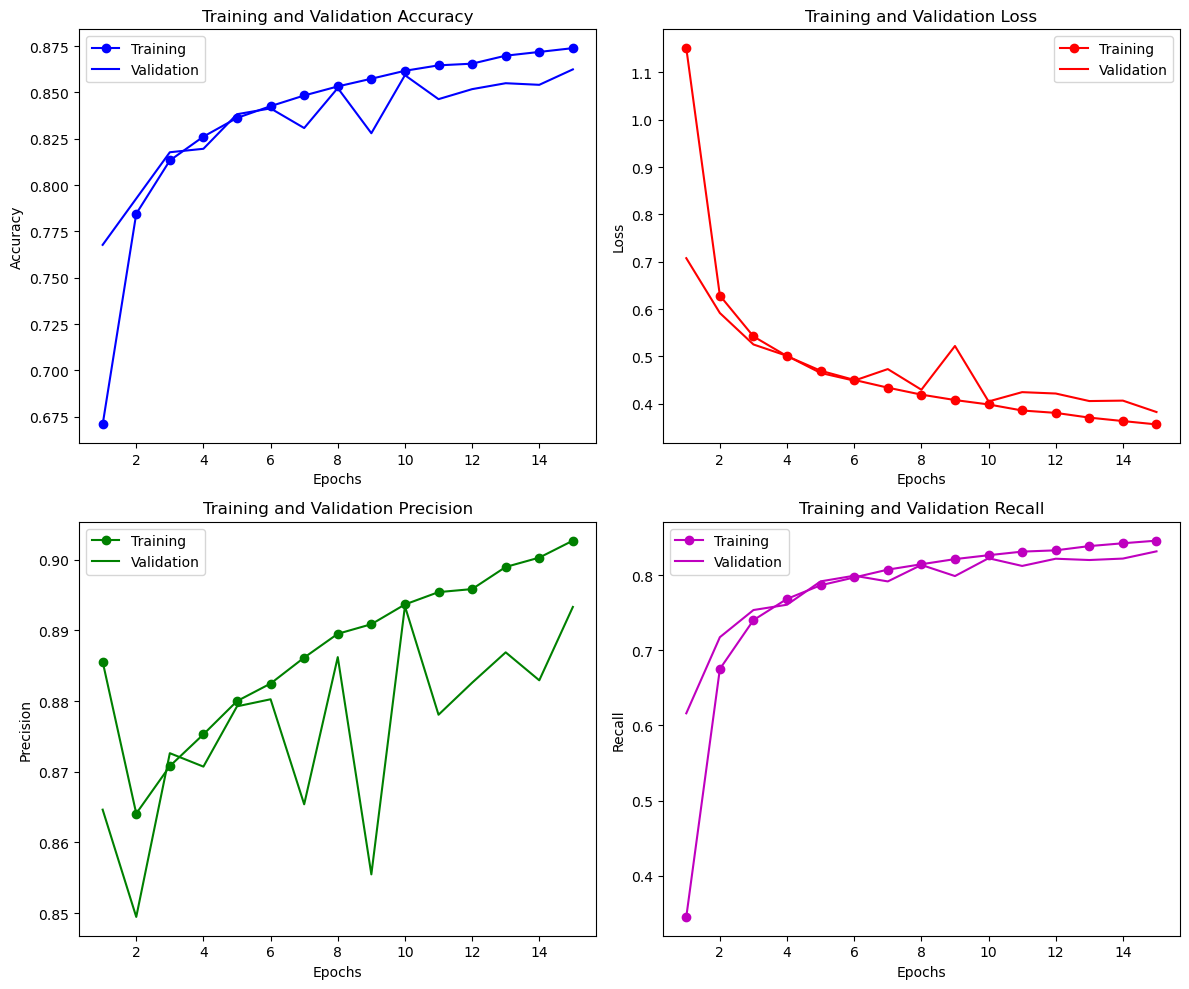

In [16]:
network = models.Sequential()

# Added more layers and more hidden units per layer
network.add(layers.Dense(1024, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))

# Output layer with 10 units (one per class) and Softmax activation
network.add(layers.Dense(10, activation='softmax'))

# Compile the model with SGD optimiser
network.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

# Train for more epochs to make it overfit
sgd_history = network.fit(
    partial_train_images, 
    partial_train_labels, 
    # increased from 6 to 15
    epochs=15, 
    batch_size=128, 
    validation_data=(validation_images, validation_labels))

plot_statistic(sgd_history)

### Overall metrics

Loss: It decreases with the increase of epochs. The models are learning, but the Adam optimiser performs better in fitting the training data.
Val_loss: It’s higher than the loss, in particular for the Adam optimiser, indicating some overfitting.
Accuracy: The highest is in the Adam model.
Val_accuracy: It is much lower of the training accuracy in the Adam model, indicating overfitting.
Precision: All models predicts positive class correctly, but the best is the Adam model, indicating it is making fewer false positive predictions compared to the other models.
Val_precision: It’s lower than the training prediction, in particular in the Adam model, indicating many false positive.
Recall: Models are good at capturing positive instances (best: Adam model, worst: SGD model)
Val_recall: Models effectively identify positive classes on unseen data.  (best: baseline, worst: Adam).

### Results

Both models (Adam and SGD) show reasonable generalisation, but the Adam optimiser (despite some overfitting) outperforms SGD in higher training and validation accuracy due to its adaptive learning rate. The SGD model has higher sensitivity to hyperparameters such as the learning rate, which requires more tuning.

## 7. Regularising your model and tuning hyperparameters

Both models have been scaled up and regularised to improve generalisation during training.

<ul>
    <li>In the Adam model, L2 regularisation (weight decay) has been applied, where a penalty proportional to the square of the weight coefficients is added to the loss function. Additionally, dropout was implemented by randomly setting a fraction of layer outputs to zero to reduce overfitting.</li>
    <li>In the SGD model, key hyperparameters such as learning rate (which controls the step size of updates) and momentum (which considers past gradients to accelerate learning) have been fine-tuned for better convergence.</li>
</ul>

Once regularisation and tuning were applied, both networks were tested on new images and labels to evaluate their performance.

### Adam model regularisation

- L2 regularisation (weight decay) introduced by adding a penalty to the loss function. This was implemented using the kernel_regularizer parameter in the Dense layers, with a regularisation strength of 0.001. 
<center><strong>l2(0.001)</strong> means 0.001 * w<sup>T</sup>. w</center><br>
Smaller values apply less influence, while larger values apply stronger constraints on the model’s weights.<br>


- Dropout layers were incorporated after the Dense layers, randomly deactivating 50% of tensors during training to reduce overfitting by ensuring that the model learns more generalised patterns rather than memorising the training data. The values between 0.2 and 0.5 are typically used for the dropout.

| Metric               | Lowest        | Highest       |
|----------------------|---------------|---------------|
| **Training Loss**     | 64.26%       | 188.50%       |
| **Training Accuracy** | 70.69%       | 83.31%        |
| **Training Precision**| 82.38%       | 87.34%        |
| **Training Recall**   | 59.97%       | 79.62%        |
| **Validation Loss**   | 56.60%       | 115.36%       |
| **Validation Accuracy**| 82.74%      | 86.04%        |
| **Validation Precision**| 87.70%     | 90.12%        |
| **Validation Recall** | 76.49%       | 83.17%        |


Epoch 1/15
352/352 [==============================] - 6s 15ms/step - loss: 1.8850 - accuracy: 0.7069 - precision: 0.8238 - recall: 0.5997 - val_loss: 1.1536 - val_accuracy: 0.8274 - val_precision: 0.8816 - val_recall: 0.7649
Epoch 2/15
352/352 [==============================] - 5s 15ms/step - loss: 1.0598 - accuracy: 0.8055 - precision: 0.8622 - recall: 0.7443 - val_loss: 0.8349 - val_accuracy: 0.8381 - val_precision: 0.8897 - val_recall: 0.7838
Epoch 3/15
352/352 [==============================] - 5s 14ms/step - loss: 0.8375 - accuracy: 0.8199 - precision: 0.8677 - recall: 0.7698 - val_loss: 0.6897 - val_accuracy: 0.8460 - val_precision: 0.8806 - val_recall: 0.8155
Epoch 4/15
352/352 [==============================] - 5s 14ms/step - loss: 0.7532 - accuracy: 0.8222 - precision: 0.8682 - recall: 0.7745 - val_loss: 0.6551 - val_accuracy: 0.8485 - val_precision: 0.8847 - val_recall: 0.8150
Epoch 5/15
352/352 [==============================] - 5s 15ms/step - loss: 0.7114 - accuracy: 0.8240

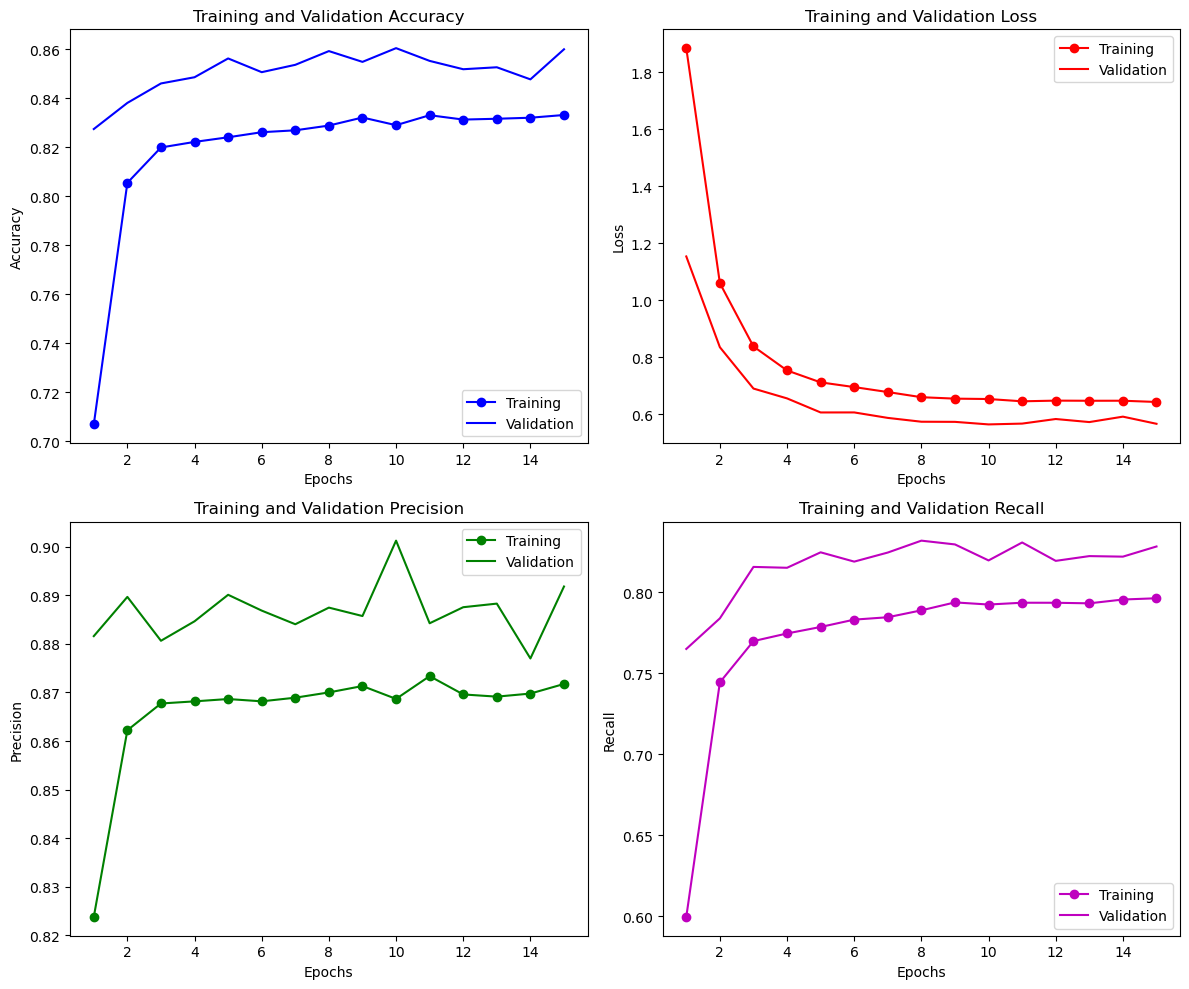

In [11]:
from tensorflow.keras import regularizers

network = models.Sequential()

# Added more layers and more hidden units per layer and dropout
network.add(layers.Dense(1024, kernel_regularizer = regularizers.l2(0.001), activation='relu', input_shape=(28*28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(256, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(128, kernel_regularizer = regularizers.l2(0.001), activation='relu'))

# Output layer with 10 units (one per class) and Softmax activation
network.add(layers.Dense(10, activation='softmax'))

# Compile the model with Adam optimiser
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

# Train for more epochs to make it overfit
l2_history = network.fit(
    partial_train_images, 
    partial_train_labels, 
    # increased from 6 to 15
    epochs=15, 
    batch_size=128, 
    validation_data=(validation_images, validation_labels))

plot_statistic(l2_history)

The evaluation_prediction function calculates the model’s performance on the test data, returning the average values of loss, accuracy, precision, and recall across all test batches. It generates a probability distribution over the 10 classes for a given test image, with each value representing the model’s confidence in the corresponding class and it returns the label with the highest prediction probability.

313/313 [==============================] - 4s 12ms/step - loss: 0.5873 - accuracy: 0.8518 - precision: 0.8842 - recall: 0.8179
Test loss: 0.5873
Test accuracy: 0.8518
Test precision: 0.8842
Test recall: 0.8179
1/1 [==============================] - 0s 125ms/step

Prediction probabilities:
[[1.9002671e-03 2.2332583e-04 9.3917537e-01 1.8146464e-04 2.5643138e-02
  8.2564893e-06 3.2723147e-02 1.1996655e-06 1.4312629e-04 7.8006252e-07]]


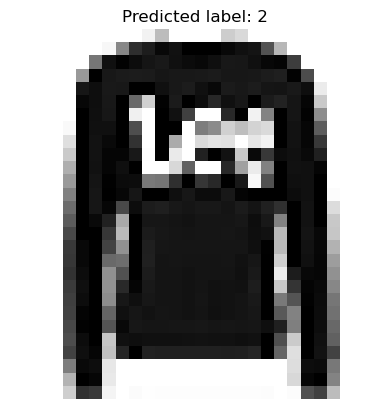

2

In [12]:
evaluation_prediction(network, test_images, test_labels)

### SGD model regularisation

Learning rate: The learning rate is an important hyperparameter that determines the step size at which the SGD model updates its weights during training. It controls how quickly or slowly the model learns from the data. In general, the learning rate is a small positive value between 0.0001 and 1.0. If the value is too high can cause the model to converge too quickly, potentially leading to a suboptimal solutions rather than the best possible one, while a value that is too low can result in extremely slow learning or cause the model to get stuck in a poor solution without improving much.

Momentum: It is used to help speed up training and improve convergence. It accumulates information from past gradients to create a smoother and more stable optimisation process. If the gradients consistently point in the same direction, momentum accelerates learning by increasing the effective learning rate. In practice, this means updating the parameter w based not only on the current gradient value but also on the previous parameter update

<center>w<sub>t+1</sub>=w<sub>t</sub> - βv<sub>t−1</sub>+η∇J(w<sub>t</sub>)</center>

where w<sub>t+1</sub> is the update of the weight<br>
v<sub>t</sub> is the velocity<br>
β is the momentum coefficient<br>
η is the learning rate<br>
∇J(w<sub>t</sub>) is the gradient of the loss function

| Metric                | Lowest       | Highest       |
|-----------------------|--------------|---------------|
| **Training Loss**     | 19.72%       | 63.22%        |
| **Training Accuracy** | 77.92%       | 92.40%        |
| **Training Precision**| 85.67%       | 93.45%        |
| **Training Recall**   | 69.91%       | 91.38%        |
| **Validation Loss**   | 30.73%       | 44.48%        |
| **Validation Accuracy**| 83.95%      | 89.05%        |
| **Validation Precision**| 87.56%     | 90.27%        |
| **Validation Recall** | 80.50%       | 87.96%        |


Epoch 1/15
352/352 [==============================] - 3s 9ms/step - loss: 0.6322 - accuracy: 0.7792 - precision: 0.8567 - recall: 0.6991 - val_loss: 0.4448 - val_accuracy: 0.8395 - val_precision: 0.8756 - val_recall: 0.8050
Epoch 2/15
352/352 [==============================] - 4s 10ms/step - loss: 0.4022 - accuracy: 0.8539 - precision: 0.8857 - recall: 0.8229 - val_loss: 0.4074 - val_accuracy: 0.8510 - val_precision: 0.8815 - val_recall: 0.8215
Epoch 3/15
352/352 [==============================] - 3s 9ms/step - loss: 0.3605 - accuracy: 0.8665 - precision: 0.8945 - recall: 0.8413 - val_loss: 0.3817 - val_accuracy: 0.8573 - val_precision: 0.8878 - val_recall: 0.8263
Epoch 4/15
352/352 [==============================] - 3s 8ms/step - loss: 0.3244 - accuracy: 0.8812 - precision: 0.9045 - recall: 0.8577 - val_loss: 0.3366 - val_accuracy: 0.8777 - val_precision: 0.9026 - val_recall: 0.8577
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 0.3023 - accuracy: 0.8880 - p

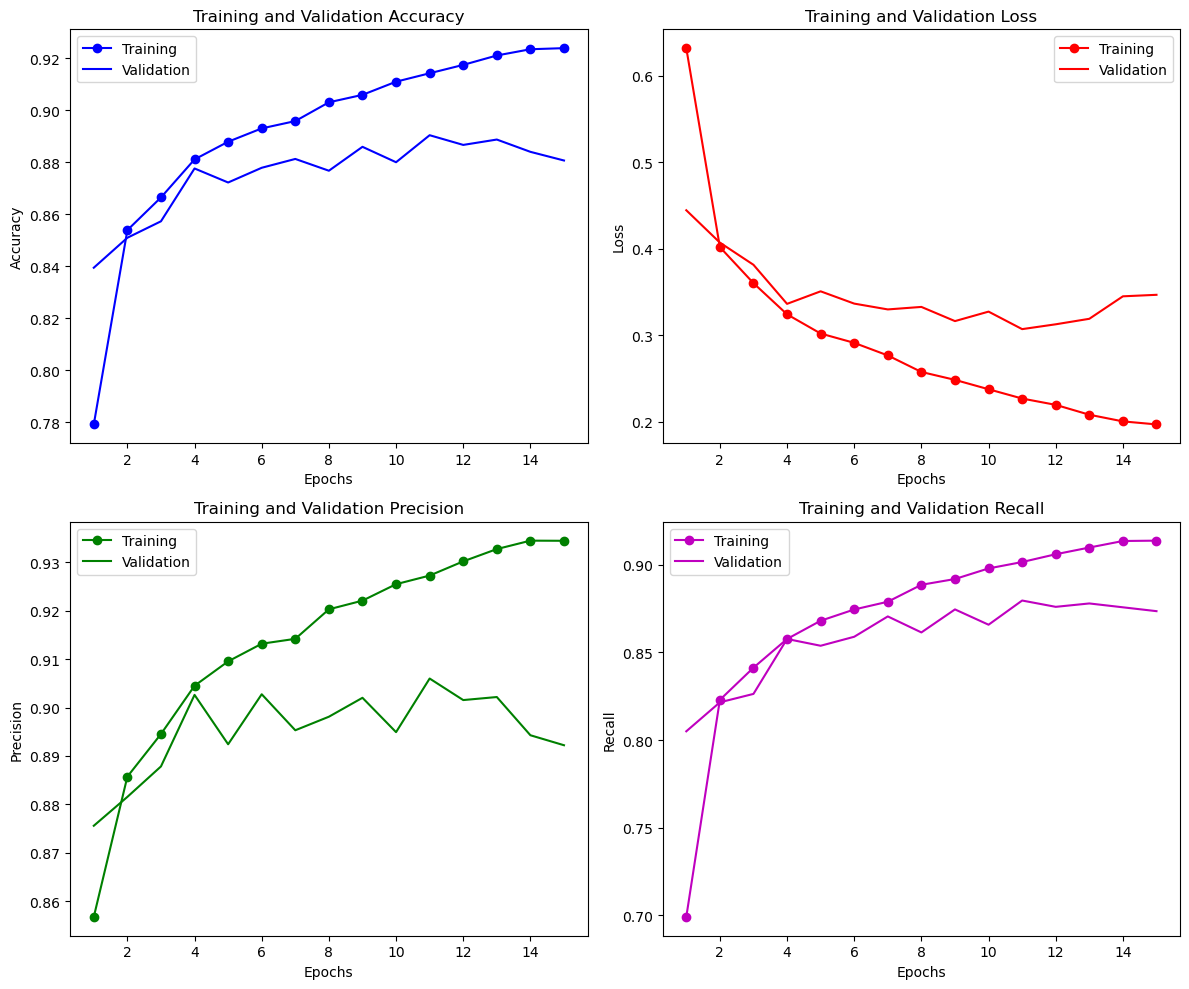

In [13]:
from tensorflow.keras import optimizers

# Create a Sequential model
network = models.Sequential()

# Added more layers and more hidden units per layer
network.add(layers.Dense(1024, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))

# Output layer with 10 units (one per class) and Softmax activation
network.add(layers.Dense(10, activation='softmax'))

# Compile the model with SGD optimiser with momentum and a tuned learning rate
learning_rate = 0.01
momentum = 0.95 
sgd_optimizer = optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

network.compile(optimizer=sgd_optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

# Train for more epochs
lm_history = network.fit(
    partial_train_images, 
    partial_train_labels, 
    epochs=15, 
    batch_size=128, 
    validation_data=(validation_images, validation_labels))

plot_statistic(lm_history)

Like for the Adam optimiser model, the evaluation_prediction function calculates the model’s performance on the test data, returning the average values of loss, accuracy, precision, and recall across all test batches. It generates a probability distribution over the 10 classes for a given test image, with each value representing the model’s confidence in the corresponding class and it returns the label with the highest prediction probability.

313/313 [==============================] - 3s 10ms/step - loss: 0.3705 - accuracy: 0.8759 - precision: 0.8876 - recall: 0.8665
Test loss: 0.3705
Test accuracy: 0.8759
Test precision: 0.8876
Test recall: 0.8665
1/1 [==============================] - 0s 74ms/step

Prediction probabilities:
[[9.0763833e-06 1.5142215e-08 9.9517459e-01 5.1411209e-09 4.6687168e-03
  8.6959888e-09 1.4754393e-04 2.1897877e-10 5.9051747e-08 5.6569056e-09]]


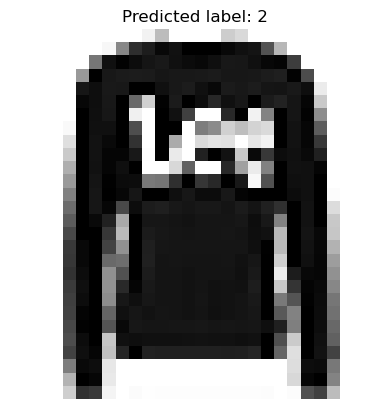

2

In [14]:
evaluation_prediction(network, test_images, test_labels)

## Conclusion

| Model                  | Training loss | Training accuracy | Training precision | Training recall | Validation loss | Validation accuracy | Validation precision | Validation recall | Test loss | Test accuracy | Test precision | Test recall |
|------------------------|---------------|-------------------|--------------------|-----------------|-----------------|---------------------|----------------------|-------------------|-----------|---------------|----------------|-------------|
| **Baseline**            | 28.94%        | 89.20%            | 91.14%             | 87.48%          | 32.28%          | 88.15%              | 91.14%               | 87.48%            | 58.73%    | 85.18%        | 88.42%         | 81.79%      |
| **Adam Scaled Up**      | 18.45%        | 92.90%            | 93.78%             | 92.16%          | 31.53%          | 89.52%              | 90.68%               | 88.53%            | 37.05%    | 87.59%        | 88.76%         | 86.65%      |
| **SGD Scaled Up**       | 35.63%       | 87.39%            | 90.27%             | 84.59%          | 38.25%          | 86.25%              | 89.33%               | 83.17%            | 37.05%    | 87.59%        | 88.76%         | 86.65%      |
| **Adam Regularised**    | 64.26%       | 83.31%            | 87.34%             | 79.62%          | 56.60%         | 86.04%              | 90.12%               | 83.17%            | 58.73%    | 85.18%        | 88.42%         | 81.79%      |
| **SGD Regularised**     | 19.72%        | 92.40%            | 93.45%             | 91.38%          | 30.73%          | 89.05%              | 90.27%               | 87.96%            | 37.05%    | 87.59%        | 88.76%         | 86.65%      |



The project began with a baseline neural network model with a single hidden layer of 512 units and the relu activation function. This model, trained with the RMSprop optimiser achieving a validation accuracy of 88.15%, with a precision of 91.14% and recall of 87.48% after six epochs. While it performed well, there was room for improvement, particularly in reducing loss and increasing generalisation.

The baseline model was scaled up with two different strategies: the RMSprop optimiser was changed to Adam and SGD optimisers to compare their impact on performance. Both the models had their capacity increased by adding more hidden layers and increasing the number of units per layer. The training was extended to 15 epochs to allow the model to converge further.

The Adam-optimised model outperformed both RMSprop and SGD, achieving a validation accuracy of 92.90%, precision of 93.78%, and recall of 92.16%. The loss decreased over epochs, but it also led to overfitting due to its higher complexity and prolonged training. On the other hand, the SGD-optimised model had the lowest validation accuracy and struggled more in learning efficiently, driving to higher loss values in earlier epochs but improved gradually over time, with an accuracy of 89.33%, precision of 90.27% and recall of 84.59%. Tuning the hyperparameters significantly improved its stability and generalisation.

Overall, the project demonstrated that the Adam optimiser proved to be the most effective, balancing convergence speed and final performance. However, the SGD model showed evident improvement when carefully tuning its hyperparameters, particularly with the learning rate and momentum, which upgraded stability and generalisation. Both models have shown a performance improvement after regularisation and they were both able to classify clothing images with reasonable accuracy (~88–93%).

## Reference

The main sources of references for this project are the course's lectures and essential reading, in particular Francois Chollet (2018), *Deep learning with Python* (1st Edition). Other resources are:

aakashns, Deep Learning Workbook, GitHub, available at: https://github.com/aakashns/deep-learning-workbook/blob/master/examples/00_mnist_basic.ipynb

StackOverflow, How to calculate precision and recall in Keras, available at: https://stackoverflow.com/questions/43076609/how-to-calculate-precision-and-recall-in-keras

Papers with code, SGD with Momentum, available at: https://paperswithcode.com/method/sgd-with-momentum

Ayush Gupta, Optimizers in Deep Learning: A Detailed Guide, available at: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/

Kartik Chaudhary, Understanding Optimizers for training Deep Learning Models, available at: https://medium.com/game-of-bits/understanding-optimizers-for-training-deep-learning-models-694c071b5b70

StackOverflow, How to get rid of the _N for Keras metric names?, available at: https://stackoverflow.com/questions/57120261/how-to-get-rid-of-the-n-for-keras-metric-names